In [1]:
pip install pyspark

Note: you may need to restart the kernel to use updated packages.


In [2]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

In [3]:
spark = SparkSession.builder.appName("CRM").getOrCreate()

In [4]:
input_file = "customer_churn.csv"
df = spark.read.csv(input_file, header=True)
df

DataFrame[RowNumber: string, CustomerId: string, Surname: string, CreditScore: string, Geography: string, Gender: string, Age: string, Tenure: string, Balance: string, NumOfProducts: string, HasCrCard: string, IsActiveMember: string, EstimatedSalary: string, Exited: string, Complain: string, Satisfaction Score: string, Card Type: string, Point Earned: string]

In [5]:
df.show()

+---------+----------+---------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+--------+------------------+---------+------------+
|RowNumber|CustomerId|  Surname|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|Complain|Satisfaction Score|Card Type|Point Earned|
+---------+----------+---------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+--------+------------------+---------+------------+
|        1|  15634602| Hargrave|        619|   France|Female| 42|     2|        0|            1|        1|             1|      101348.88|     1|       1|                 2|  DIAMOND|         464|
|        2|  15647311|     Hill|        608|    Spain|Female| 41|     1| 83807.86|            1|        0|             1|      112542.58|     0|       1|                 3|  DIAMOND|         456|
|        3|  1561930

In [6]:
#Data Transformation

# Create a new column "BalancePerProduct" by dividing "Balance" by "NumOfProducts"
df = df.withColumn("BalancePerProduct", df["Balance"] / df["NumOfProducts"])

In [7]:
df.select("CustomerId", "Balance", "NumOfProducts", "BalancePerProduct").show()

+----------+---------+-------------+-----------------+
|CustomerId|  Balance|NumOfProducts|BalancePerProduct|
+----------+---------+-------------+-----------------+
|  15634602|        0|            1|              0.0|
|  15647311| 83807.86|            1|         83807.86|
|  15619304| 159660.8|            3|53220.26666666666|
|  15701354|        0|            2|              0.0|
|  15737888|125510.82|            1|        125510.82|
|  15574012|113755.78|            2|         56877.89|
|  15592531|        0|            2|              0.0|
|  15656148|115046.74|            4|        28761.685|
|  15792365|142051.07|            2|        71025.535|
|  15592389|134603.88|            1|        134603.88|
|  15767821|102016.72|            2|         51008.36|
|  15737173|        0|            2|              0.0|
|  15632264|        0|            2|              0.0|
|  15691483|        0|            2|              0.0|
|  15600882|        0|            2|              0.0|
|  1564396

In [8]:
# Show all rows in the DataFrame
df.select("CustomerId", "Balance", "NumOfProducts", "BalancePerProduct").show(df.count(), truncate=False)

+----------+---------+-------------+------------------+
|CustomerId|Balance  |NumOfProducts|BalancePerProduct |
+----------+---------+-------------+------------------+
|15634602  |0        |1            |0.0               |
|15647311  |83807.86 |1            |83807.86          |
|15619304  |159660.8 |3            |53220.26666666666 |
|15701354  |0        |2            |0.0               |
|15737888  |125510.82|1            |125510.82         |
|15574012  |113755.78|2            |56877.89          |
|15592531  |0        |2            |0.0               |
|15656148  |115046.74|4            |28761.685         |
|15792365  |142051.07|2            |71025.535         |
|15592389  |134603.88|1            |134603.88         |
|15767821  |102016.72|2            |51008.36          |
|15737173  |0        |2            |0.0               |
|15632264  |0        |2            |0.0               |
|15691483  |0        |2            |0.0               |
|15600882  |0        |2            |0.0         

In [9]:
#Data Analysis
# Calculate the average credit score
average_credit_score = df.selectExpr("avg(CreditScore)").collect()[0][0]
print(f"Average Credit Score: {average_credit_score}")

Average Credit Score: 650.5288


In [10]:
#Data Filtering
# Filter data to keep only female customers
female_customers = df.filter(df["Gender"] == "Female")
female_customers.show()

+---------+----------+----------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+--------+------------------+---------+------------+-----------------+
|RowNumber|CustomerId|   Surname|CreditScore|Geography|Gender|Age|Tenure|  Balance|NumOfProducts|HasCrCard|IsActiveMember|EstimatedSalary|Exited|Complain|Satisfaction Score|Card Type|Point Earned|BalancePerProduct|
+---------+----------+----------+-----------+---------+------+---+------+---------+-------------+---------+--------------+---------------+------+--------+------------------+---------+------------+-----------------+
|        1|  15634602|  Hargrave|        619|   France|Female| 42|     2|        0|            1|        1|             1|      101348.88|     1|       1|                 2|  DIAMOND|         464|              0.0|
|        2|  15647311|      Hill|        608|    Spain|Female| 41|     1| 83807.86|            1|        0|             1|      112542.58|  

In [11]:
#Data Aggregation
# Group data by "Geography" and calculate the average "Balance"
avg_balance_by_geography = df.groupBy("Geography").agg({"Balance": "avg"})
avg_balance_by_geography.show()

+---------+------------------+
|Geography|      avg(Balance)|
+---------+------------------+
|  Germany|119730.11613391782|
|   France|  62092.6365157559|
|    Spain| 61818.14776342349|
+---------+------------------+



In [33]:
import pandas as pd
import numpy as np

In [13]:
# Pandas Dataframe
pandas_df = pd.read_csv("customer_churn.csv")

pandas_df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339


In [14]:
pandas_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [15]:
pandas_df.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0,1,DIAMOND,300
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0,5,PLATINUM,771
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,1,3,SILVER,564
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,1,2,GOLD,339
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0,0,3,DIAMOND,911


In [16]:
pandas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [17]:
pandas_df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


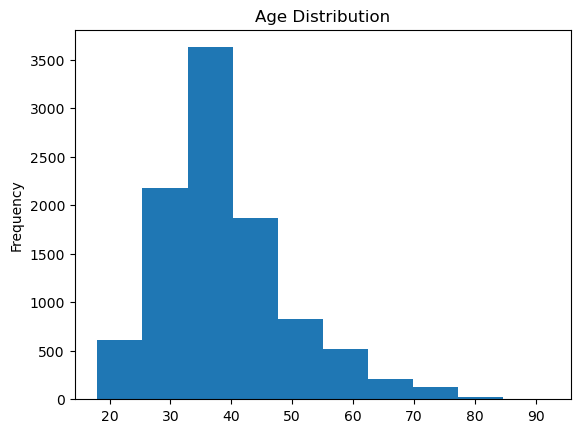

In [18]:
import matplotlib.pyplot as plt
pandas_df['Age'].plot(kind='hist')
plt.title('Age Distribution')
plt.show()

In [19]:
categorical_only = pd.DataFrame ({
    'Geography': pandas_df ['Geography'],
    'Gender': pandas_df ['Gender'],
    'Card Type': pandas_df ['Card Type']
})

categorical_only

,Geography,Gender,Card Type
0,France,Female,DIAMOND
1,Spain,Female,DIAMOND
2,France,Female,DIAMOND
3,France,Female,GOLD
4,Spain,Female,GOLD
...,...,...,...
9995,France,Male,DIAMOND
9996,France,Male,PLATINUM
9997,France,Female,SILVER
9998,Germany,Male,GOLD


In [20]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder (sparse = False)
encoder.fit (categorical_only)
column_list = list (encoder.get_feature_names_out (['Geography', 'Gender', 'Card Type']))
column_list

C:\Users\aqwa\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


['Geography_France',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Female',
 'Gender_Male',
 'Card Type_DIAMOND',
 'Card Type_GOLD',
 'Card Type_PLATINUM',
 'Card Type_SILVER']

In [21]:
categorical_np = encoder.transform (categorical_only)
print (categorical_np)
print (categorical_np.shape)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 1.]
 [0. 1. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
(10000, 9)


In [22]:
categorical_df = pd.DataFrame (categorical_np, columns = column_list)
categorical_df

,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
9995,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
9996,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9997,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9998,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [23]:
final_data = pandas_df.join (categorical_df)
final_data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,...,464,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,...,456,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,...,377,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,...,350,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,...,425,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,...,300,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,...,771,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,...,564,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,...,339,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [28]:
final_data.drop (columns = ['Geography', 'Gender', 'Card Type'], inplace = True)
final_data

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,...,464,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,...,456,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,...,377,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,...,350,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,...,425,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,...,300,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,...,771,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,...,564,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,...,339,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [29]:
dataX = final_data.drop (columns = ['Exited', 'Surname'])
dataX

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,...,Point Earned,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,1,15634602,619,42,2,0.00,1,1,1,101348.88,...,464,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1,2,15647311,608,41,1,83807.86,1,0,1,112542.58,...,456,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,3,15619304,502,42,8,159660.80,3,1,0,113931.57,...,377,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,4,15701354,699,39,1,0.00,2,0,0,93826.63,...,350,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,5,15737888,850,43,2,125510.82,1,1,1,79084.10,...,425,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,771,39,5,0.00,2,1,0,96270.64,...,300,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
9996,9997,15569892,516,35,10,57369.61,1,1,1,101699.77,...,771,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9997,9998,15584532,709,36,7,0.00,1,0,1,42085.58,...,564,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9998,9999,15682355,772,42,3,75075.31,2,1,0,92888.52,...,339,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [30]:
dataY = pd.DataFrame ({
    'Exited': final_data['Exited']
})
dataY

,Exited
0,1
1,0
2,1
3,0
4,0
...,...
9995,0
9996,0
9997,1
9998,1


In [35]:
from sklearn.model_selection import train_test_split
trainX, testX, trainY, testY = train_test_split (dataX, dataY, test_size = 0.2, random_state = 11)

In [36]:
from sklearn.preprocessing import StandardScaler

columns = trainX.columns.tolist()

scaler = StandardScaler ()
trainX = scaler.fit_transform(trainX)
trainX = pd.DataFrame (np.squeeze (trainX), columns = columns)

In [37]:
testX = scaler.transform (testX)
testX = pd.DataFrame (np.squeeze (testX), columns = columns)

In [38]:
from sklearn.linear_model import SGDClassifier
model = SGDClassifier(shuffle = False)
model.fit (trainX, trainY.values.ravel())

SGDClassifier(shuffle=False)

In [39]:
print ('Intercept: ', model.intercept_)
print ('Coefficients: ', model.coef_)
print ('accuracy on training data: ', model.score (trainX, trainY))
print ('accuracy on test data: ', model.score (testX, testY))

Intercept:  [-17.57863316]
Coefficients:  [[ 0.092879    0.3346326   0.12604046  0.71217579 -0.20849979  0.12210202
   0.08900806 -0.03027166 -0.27012585  0.20974476 10.80061851 -0.26171368
  -0.47577086 -0.20992171  0.18825318  0.05430053  0.16517231 -0.16517231
  -0.16537145  0.16742116 -0.17812673  0.17522654]]
accuracy on training data:  0.99875
accuracy on test data:  0.998


In [40]:
from sklearn.metrics import confusion_matrix

predictions = model.predict (trainX)
confusion_matrix (trainY, predictions)

array([[6353,    7],
       [   3, 1637]], dtype=int64)

In [47]:
#from sklearn.metrics import classification_report

#targets = ['0', '1']
#print (classification_report (trainY, predictions, target_names = targets))